# import modules 

In [1]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.cluster import hierarchy

# helper functions (if needed)

In [2]:
# python code...

# read data file into pandas dataframe 

In [3]:
names = ["c1", "c2", "c3", "c4", "c5", "c6", "c7"]
data = pd.read_csv("mystery.csv", delimiter = "\t", names = names)
print(data)

        c1     c2      c3     c4     c5     c6     c7
0    14.29  14.09  0.9050  5.291  3.337  2.699  4.825
1    12.13  13.73  0.8081  5.394  2.745  4.825  5.220
2    11.19  13.05  0.8253  5.250  2.675  5.813  5.219
3    10.59  12.41  0.8648  4.899  2.787  4.975  4.794
4    11.02  13.00  0.8189  5.325  2.701  6.735  5.163
..     ...    ...     ...    ...    ...    ...    ...
205  14.59  14.28  0.8993  5.351  3.333  4.185  4.781
206  14.01  14.29  0.8625  5.609  3.158  2.217  5.132
207  14.43  14.40  0.8751  5.585  3.272  3.975  5.144
208  11.82  13.40  0.8274  5.314  2.777  4.471  5.178
209  14.69  14.49  0.8799  5.563  3.259  3.586  5.219

[210 rows x 7 columns]


# experiment w/ clustering algorithms & parameters

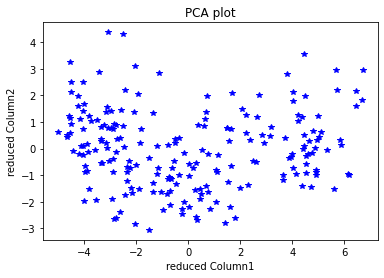

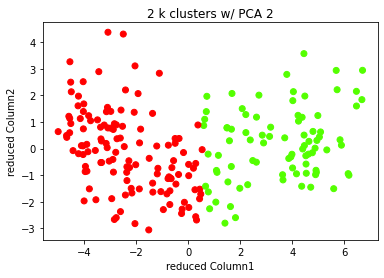

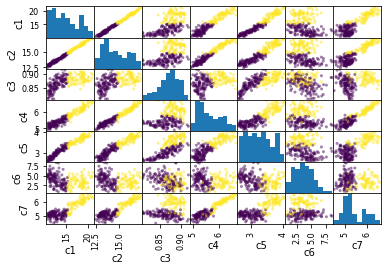

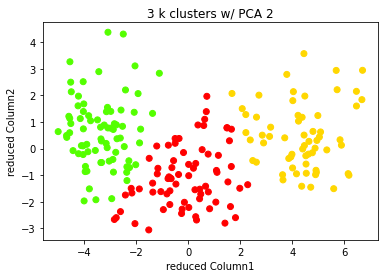

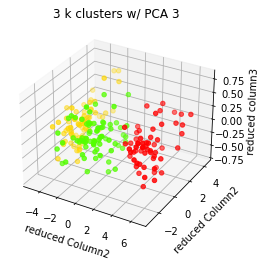

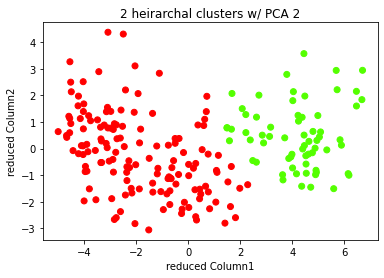

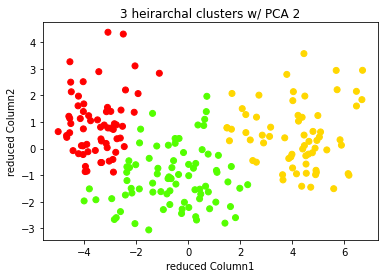

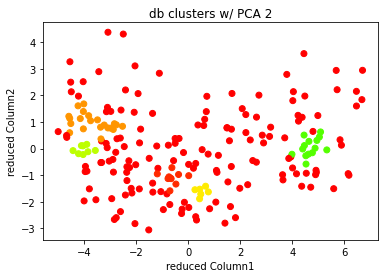

In [4]:
dataPCA = PCA(n_components=(2)).fit_transform(data)
reduced = pd.DataFrame(dataPCA, columns = ["column1", "column2"])
plt.plot(reduced["column1"], reduced["column2"], 'b*')
plt.ylabel("reduced Column2")
plt.xlabel("reduced Column1")
plt.title("PCA plot")
plt.show()

kmeans = KMeans(n_clusters = 2)
result = kmeans.fit_predict(data)
dataPCA = PCA(n_components=(2)).fit_transform(data)
reduced = pd.DataFrame(dataPCA, columns = ["column1", "column2"])
plt.scatter(reduced["column1"], reduced["column2"], c = result, cmap='prism')
plt.ylabel("reduced Column2")
plt.xlabel("reduced Column1")
plt.title("2 k clusters w/ PCA 2")
plt.show()

pd.plotting.scatter_matrix(data, c = result);
plt.show()

kmeans = KMeans(n_clusters = 3)
result = kmeans.fit_predict(data)
dataPCA = PCA(n_components=(2)).fit_transform(data)
reduced = pd.DataFrame(dataPCA, columns = ["column1", "column2"])
plt.scatter(reduced["column1"], reduced["column2"], c = result, cmap='prism')
plt.ylabel("reduced Column2")
plt.xlabel("reduced Column1")
plt.title("3 k clusters w/ PCA 2")
plt.show()

ax = plt.axes(projection='3d')
kmeans = KMeans(n_clusters = 3)
result = kmeans.fit_predict(data)
dataPCA2 = PCA(n_components=(3)).fit_transform(data)
reduced = pd.DataFrame(dataPCA2, columns = ["column1", "column2", "column3"])
ax.scatter3D(reduced["column1"], reduced["column2"],reduced["column3"], c = result, cmap='prism')
ax.set_ylabel("reduced Column2")
ax.set_xlabel("reduced Column2")
ax.set_zlabel("reduced column3")
ax.set_title("3 k clusters w/ PCA 3")
plt.show()

hier = AgglomerativeClustering(n_clusters=2, linkage = 'average')
model = hier.fit_predict(data)
dataPCA = PCA(n_components=(2)).fit_transform(data)
reduced = pd.DataFrame(dataPCA, columns = ["column1", "column2"])
plt.scatter(reduced["column1"], reduced["column2"], c = model, cmap='prism')
plt.ylabel("reduced Column2")
plt.xlabel("reduced Column1")
plt.title("2 heirarchal clusters w/ PCA 2")
plt.show()

hier = AgglomerativeClustering(n_clusters=3, linkage = 'average')
model = hier.fit_predict(data)
dataPCA = PCA(n_components=(2)).fit_transform(data)
reduced = pd.DataFrame(dataPCA, columns = ["column1", "column2"])
plt.scatter(reduced["column1"], reduced["column2"], c = model, cmap='prism')
plt.ylabel("reduced Column2")
plt.xlabel("reduced Column1")
plt.title("3 heirarchal clusters w/ PCA 2")
plt.show()

dbscan = DBSCAN()
model2 = dbscan.fit_predict(data)
dataPCA = PCA(n_components=(2)).fit_transform(data)
reduced = pd.DataFrame(dataPCA, columns = ["column1", "column2"])
plt.scatter(reduced["column1"], reduced["column2"], c = model2, cmap='prism')
plt.ylabel("reduced Column2")
plt.xlabel("reduced Column1")
plt.title("db clusters w/ PCA 2")
plt.show()

# visualize nClusters vs. SSE

C:\Users\weste\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


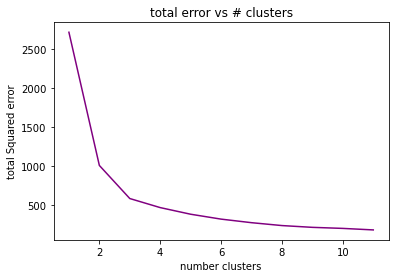

In [5]:
##iv refers to inertia an attribute of kMeans
##inertia is the sum of squared distances of samples to their closest cluster
iv=[]
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit_predict(data)
    iv.append(kmeans.inertia_)
plt.plot(range(1,12), iv, color = 'purple')
plt.xlabel("number clusters")
plt.ylabel("total Squared error")
plt.title("total error vs # clusters")
plt.show()

# QUESTION: How many clusters are there? Why?

There are three clusters. When looking at the sse we see that the graph begins to degrees more linearly after k number of clusters is three. Based on this elbow graph, there are three groups based on where this bend is.

# run "best" clustering algorithm on data

In [6]:
kmeans = KMeans(n_clusters = 3)
resultClusters = kmeans.fit_predict(data)
print(resultClusters)

[0 1 1 1 1 2 0 0 0 1 2 0 0 1 1 0 1 1 1 1 0 2 1 1 2 0 0 0 0 0 1 1 1 2 0 0 2
 2 0 2 2 1 2 0 1 0 2 2 2 1 1 0 1 1 2 1 0 0 0 0 2 1 0 2 0 2 0 2 2 1 2 0 0 0
 2 1 2 0 2 1 1 2 1 2 1 1 1 2 1 2 2 1 0 1 1 0 0 1 0 2 2 0 1 0 1 2 0 0 1 0 1
 1 1 2 0 0 1 0 2 2 1 1 2 1 1 1 1 2 0 2 0 1 0 2 1 0 0 1 2 0 2 2 1 2 0 2 1 1
 1 0 2 0 0 2 1 2 1 2 1 2 2 2 1 1 2 2 1 0 2 0 2 1 2 0 1 1 1 0 0 2 0 0 1 2 1
 2 0 2 1 0 1 0 1 0 0 0 0 1 0 1 1 1 2 0 2 0 0 0 1 0]


# visualize clustered data 

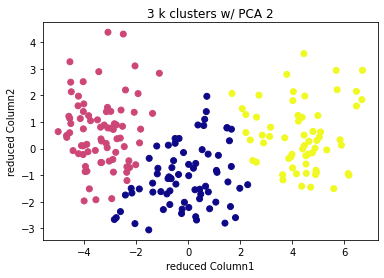

array([[<AxesSubplot:xlabel='c1', ylabel='c1'>,
        <AxesSubplot:xlabel='c2', ylabel='c1'>,
        <AxesSubplot:xlabel='c3', ylabel='c1'>,
        <AxesSubplot:xlabel='c4', ylabel='c1'>,
        <AxesSubplot:xlabel='c5', ylabel='c1'>,
        <AxesSubplot:xlabel='c6', ylabel='c1'>,
        <AxesSubplot:xlabel='c7', ylabel='c1'>],
       [<AxesSubplot:xlabel='c1', ylabel='c2'>,
        <AxesSubplot:xlabel='c2', ylabel='c2'>,
        <AxesSubplot:xlabel='c3', ylabel='c2'>,
        <AxesSubplot:xlabel='c4', ylabel='c2'>,
        <AxesSubplot:xlabel='c5', ylabel='c2'>,
        <AxesSubplot:xlabel='c6', ylabel='c2'>,
        <AxesSubplot:xlabel='c7', ylabel='c2'>],
       [<AxesSubplot:xlabel='c1', ylabel='c3'>,
        <AxesSubplot:xlabel='c2', ylabel='c3'>,
        <AxesSubplot:xlabel='c3', ylabel='c3'>,
        <AxesSubplot:xlabel='c4', ylabel='c3'>,
        <AxesSubplot:xlabel='c5', ylabel='c3'>,
        <AxesSubplot:xlabel='c6', ylabel='c3'>,
        <AxesSubplot:xlabel='c7', ylab

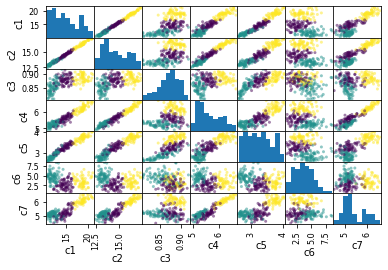

In [7]:
dataPCA = PCA(n_components=(2)).fit_transform(data)
reduced = pd.DataFrame(dataPCA, columns = ["column1", "column2"])
plt.scatter(reduced["column1"], reduced["column2"], c = resultClusters, cmap='plasma')
plt.ylabel("reduced Column2")
plt.xlabel("reduced Column1")
plt.title("3 k clusters w/ PCA 2")
plt.show()

pd.plotting.scatter_matrix(data, c = resultClusters)

# write labeled data to \<YourLastName>.csv

In [8]:
data['label']=resultClusters
data.to_csv('Cumro.csv', header=False, index=False, sep='\t')